In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [290]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='seaborn.axisgrid')

In [291]:
ins_data_frame = pd.read_csv('./insurance.csv')

print(ins_data_frame.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [292]:
print(ins_data_frame.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [293]:
print(ins_data_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Checking for Missing Values.

In [294]:
print(ins_data_frame.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Data Pre-Processing

Encoding the categorical features

In [295]:
# encoding 'sex' column
ins_data_frame.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
ins_data_frame.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
ins_data_frame.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

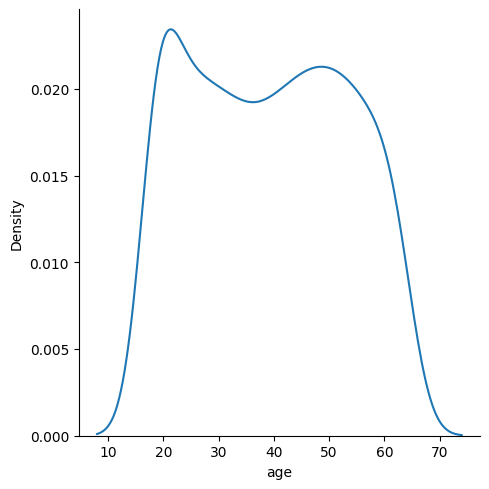

In [296]:
sns.displot(data=ins_data_frame, x="age",kind='kde')

<Axes: xlabel='sex', ylabel='count'>

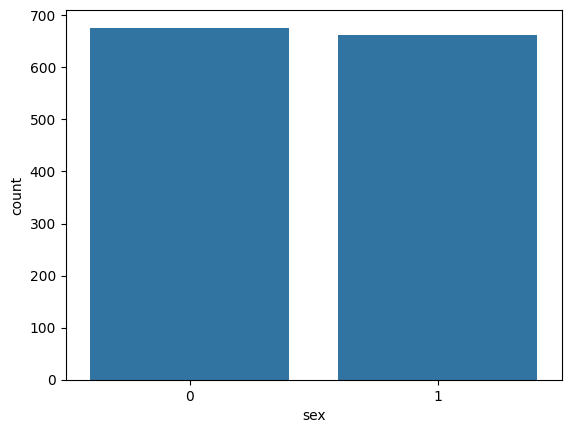

In [297]:
sns.countplot(ins_data_frame, x="sex")

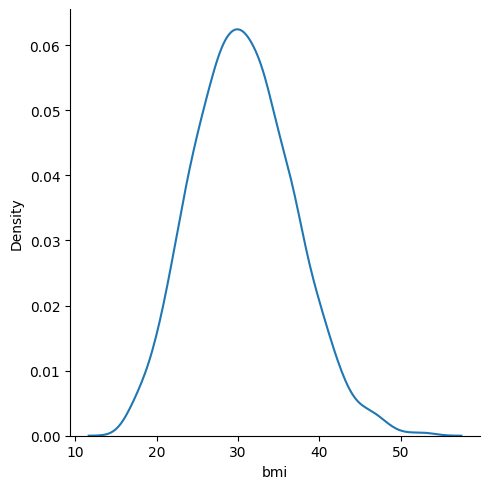

In [298]:
sns.displot(data=ins_data_frame, x="bmi",kind='kde')

<Axes: xlabel='children', ylabel='count'>

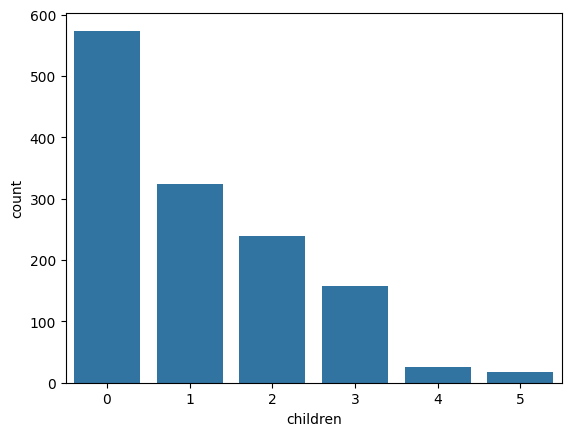

In [299]:
sns.countplot(ins_data_frame, x="children")

<Axes: xlabel='smoker', ylabel='count'>

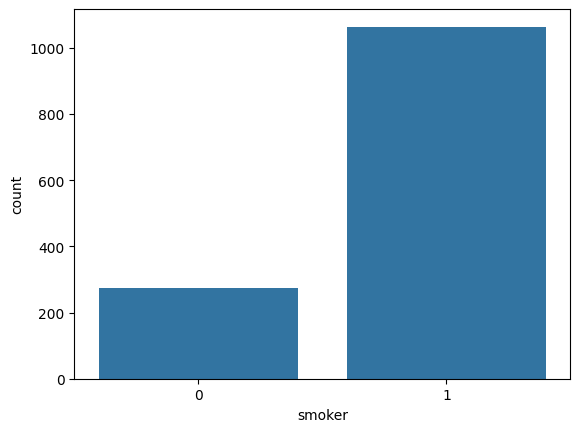

In [300]:
sns.countplot(ins_data_frame, x="smoker")

<Axes: xlabel='region', ylabel='count'>

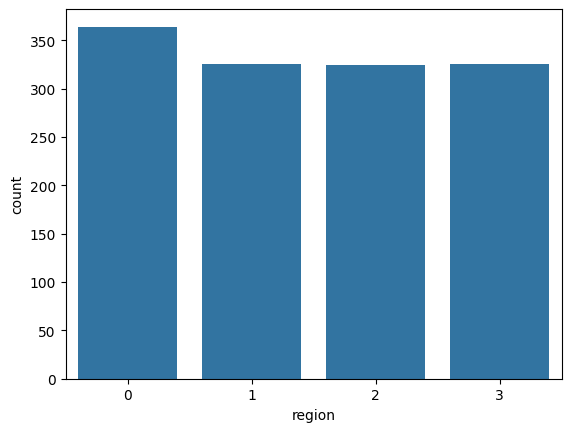

In [301]:
sns.countplot(ins_data_frame, x="region")

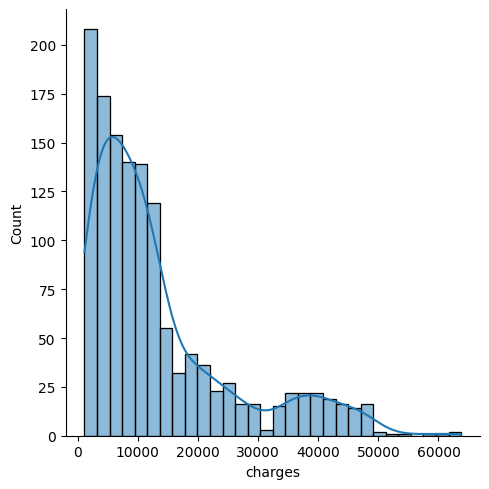

In [302]:
sns.displot(data=ins_data_frame, x="charges",kde=True)

Spliting the features and target from the Dataset

In [303]:
X = ins_data_frame.drop(columns='charges', axis=1)
Y = ins_data_frame['charges']

In [304]:
print(X.head())

   age  sex     bmi  children  smoker  region
0   19    1  27.900         0       0       1
1   18    0  33.770         1       1       0
2   28    0  33.000         3       1       0
3   33    0  22.705         0       1       3
4   32    0  28.880         0       1       3


In [305]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [306]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [307]:
model = LinearRegression()

In [308]:
model.fit(X_train,Y_train)

LinearRegression()

In [309]:
train_data_pred = model.predict(X_train)

In [310]:
r2_score_train = metrics.r2_score(Y_train,train_data_pred)

In [311]:
print(r2_score_train)

0.7472945022920751


In [312]:
test_data_pred = model.predict(X_test)

In [313]:
r2_score_test = metrics.r2_score(Y_test, test_data_pred)
print('R squared value : ', r2_score_test)

R squared value :  0.761829435021468


In [314]:
input_data = (31,1,25.74,0,1,0)
column_names = ["age","sex","bmi","children","smoker","region"]
# changing input_data to a numpy array
input_np_arrray = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_np_arrray.reshape(1,-1)

prediction_value = model.predict(pd.DataFrame(data=input_data_reshaped,columns=column_names))

print(f"The insurance cost would be: ${round(prediction_value[0],2)}")

The insurance cost would be: $3981.53
